In [43]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##### Exercise 1.

In [44]:
from decimal import *
# the decimal library can be used to set no. of decimal places
getcontext().prec = 100


# square root can be written as n to the power of 1/2
# the square root is the number that multiplies by itself to give n

 
def sqrt2(n):
    return Decimal(n**0.5)

print(sqrt2(2))


1.4142135623730951454746218587388284504413604736328125


**References:**

https://docs.python.org/3/library/decimal.html

https://www.mathsisfun.com/algebra/square-root.html


##### Exercise 2.

In [45]:
table = pd.read_html('https://en.wikipedia.org/wiki/Chi-squared_test')

In [46]:
df = pd.DataFrame(table[0])

In [47]:
df

,Unnamed: 0,A,B,C,D,total
0,White collar,90,60,104,95,349
1,Blue collar,30,50,51,20,151
2,No collar,30,40,45,35,150
3,Total,150,150,200,150,650


In [48]:
names = []

values = []
for i in range(len(df)):
    names.append(df.iloc[i][0])
    values.append(np.array(df.iloc[i][1:-1]))
print(names, values)
combined = list(zip(names,values))
print('Combined',combined)


['White collar', 'Blue collar', 'No collar', 'Total'] [array([90, 60, 104, 95], dtype=object), array([30, 50, 51, 20], dtype=object), array([30, 40, 45, 35], dtype=object), array([150, 150, 200, 150], dtype=object)]
Combined [('White collar', array([90, 60, 104, 95], dtype=object)), ('Blue collar', array([30, 50, 51, 20], dtype=object)), ('No collar', array([30, 40, 45, 35], dtype=object)), ('Total', array([150, 150, 200, 150], dtype=object))]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4 non-null      object
 1   A           4 non-null      int64 
 2   B           4 non-null      int64 
 3   C           4 non-null      int64 
 4   D           4 non-null      int64 
 5   total       4 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 320.0+ bytes


In [50]:
print(combined[1][1])
print(values)

[30 50 51 20]
[array([90, 60, 104, 95], dtype=object), array([30, 50, 51, 20], dtype=object), array([30, 40, 45, 35], dtype=object), array([150, 150, 200, 150], dtype=object)]


In [51]:
stats.chi2_contingency(values)

(24.571202858582602,
 0.003483988784534318,
 9,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462],
        [150.        , 150.        , 200.        , 150.        ]]))

### Chi Stat and Chi-square Test
**The Chi Stat is 24.57** from the above output which verifies the value given in the Wikipedia article. The Chi stat is calculated by analysing the difference between the observed and expected distributions.  Χ2 = Σ (O − E)2E / E

The chi-square test is used to test for a possible relationship between variables.  The more the observations differ from the expected distribution, the greater the chance that the variables are dependent.





### Degrees of Freedom
The degrees of freedom is 9 in this the above table. This is a measure of how many independent observations can be made. Generally, the higher the degrees of freedom is, the more relevant the Chi Square test will be.

Degrees of freedom is used in the calculation of the P value

### The P Value
**The P-value is 0.003** which indicates that neighbourhood (A,B,C,D) and type of worker living there are not independent. The difference between the expected distribution of types of worker in each area and the actual distribution is large enough to indicate that the neighbourhood and category of worker are

### References:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

https://www.investopedia.com/terms/d/degrees-of-freedom.asp

https://towardsdatascience.com/chi-squared-test-for-feature-selection-with-implementation-in-python-65b4ae7696db

https://www.mathsisfun.com/data/chi-square-test.html

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/



##### Exercise 3.


### Excel Function STDEV.P

The Excel function **STDEV.P** calculates the Standard Deviation when the values for every member of a population is known and we wish to know the standard deviation.  The function takes every member of an array representing the entire population as its arguments.  Importantly, in contrast with STDEV.S, this function uses the "n" method and the following formula √[∑(x - x̃)²/n]  .


### Excel Function STDEV.S

**STDEV.S** is an Excel function which calculates the Standard Deviation of a sample contained within a population. For most real-life scenarios, this is the best way to calculate the standard deviation as very often we do not have access to the entire target population.  This function uses the "n-1" method. "n-1" is a type of correction when calculating the standard deviation from only a sample of the total population.  The observed values are usually closer to the sample mean than to the real population mean.  Therefore using "n-1" corrects for this anticipated error by making the standard deviation larger.

### numpy Simulation



In [52]:
# Generate random 1d array as population


STDEV_P = 0
STDEV_S = 0
actual = 0
# calculate std dev of population using "n" method (default in numpy)
# this figure represents the actual standard deviation!


for i in range(10):
    # Generate random 1d array as population
    population = np.random.randint(1,1000,80)

    n_method = np.std(population)
    actual += n_method

    # take a sample of the population

    sample = np.random.choice(population,30)


    # calculate std deviation of sample using  "n" method


    n_method_sample = np.std(sample)
    STDEV_P += n_method_sample


    # calculate std deviatian of sample using "n-1"

    n_1_method_sample = np.std(sample, ddof =1)
    STDEV_S += n_1_method_sample

    
print("Actual Standard Deviation: {}\nSample Standard Deviation STDEV_P: {}\nSample Standard Deviation STDEV_S: {}".format(actual,STDEV_P,STDEV_S))

     




Actual Standard Deviation: 2932.630165825921
Sample Standard Deviation STDEV_P: 2885.83060164795
Sample Standard Deviation STDEV_S: 2935.1646129143405


In [53]:
# Generate random 1d array as population


population = np.random.randint(1,10000,80)
population

array([1341, 4923, 5401, 7973, 5820, 6352, 1967, 4793, 2172, 8983, 1076,
       6412, 2798, 4296,  622, 6982, 5310,  720, 1454, 7379, 1417, 3525,
       2221, 6542, 3634, 9649, 9968, 8792, 2332, 6500,  297, 7886, 4020,
       9593, 8328, 6550, 1537, 7644, 4189, 2063, 7562, 4925, 3944, 2869,
       2710, 5592, 5474, 7155, 5277,  617, 5354, 9262, 3292, 7917, 9382,
        882, 3966, 9369, 5353, 5672,  997, 2081, 7710, 2723, 2092, 4221,
       8481, 4641, 5832, 4906, 2406, 9287, 4197, 5544, 9527, 7440, 7006,
       4722, 6104,  323])

In [54]:
# calculate std dev of population using "n" method (default in numpy)
# this figure represents the actual standard deviation!
results = []
for i in range(500):
    
    actual = np.std(population)
 

    # take a sample of the population

    sample = np.random.choice(population,100)
    sample

    # calculate std deviation of sample using  STDEV.P ("n" method) 

    STDEV_P = np.std(sample)

    error_STDEV_P =  abs(actual - STDEV_P) 
    error_STDEV_P

    # calculate std deviatian of sample using STDEV.S ("n-1" method)

    STDEV_S = np.std(sample, ddof =1)
    error_STDEV_S = abs(actual - STDEV_S) 
    error_STDEV_S

    hypothesis = abs(error_STDEV_S < error_STDEV_P)

    results.append(hypothesis)

print("STDEV.S was more accurate in {0:.3} % of trials".format(int(results.count(True))/ 500* 100)) 

STDEV.S was more accurate in 53.8 % of trials


### References:

https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation#:~:text=The%20standard%20deviation%20calculated%20with%20a%20divisor%20of,the%20population%20from%20which%20the%20sample%20was%20drawn.

https://honingds.com/blog/python-standard-deviation/#:~:text=numpy%20uses%20population%20standard%20deviation%20by%20default%2C%20which,using%20numpy.std%20for%20a%20sample%20of%20the%20data.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html

#### Exercise 4.

**K-Means clustering** is an unsupervised algorithm which groups datapoints into clusters according to their proximity to centroids, which the algorithm calculates.  These are the nucleus of each cluster determined by the algorithm.

One of the difficulties with K-means clustering is determining how many clusters are present in the data. Each cluster represents a category of data such as as a Species of Iris. The elbow algorithm can be used to optimise the K number, but this was not nescessary with the Iris dataset as we already know that k=3.

Instead, I created a k-means model using Sklearn creating 3 clusters and tested the % of correct predictions. At the time of testing the accuracy of the model was 89.33%

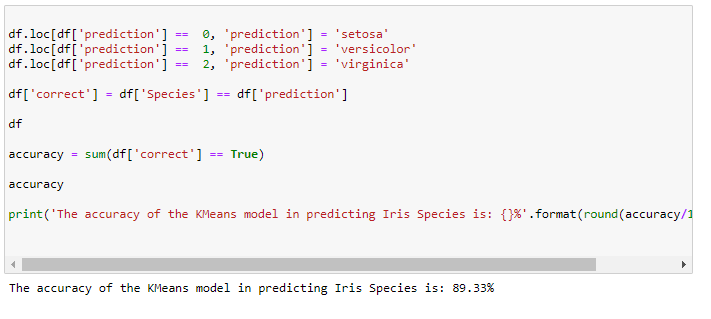



In [55]:
iris = load_iris()
iris.data
iris.feature_names
iris.target
iris.target_names

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

df['Species'] = iris['target']
df['Species'] = df['Species'].apply(lambda x: iris['target_names'][x]) # [3]
df.head()
x = df.iloc[:, [0,1,2,3]].values


In [70]:
iris.target_names
# The target names were matched manually with the clusters


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
kmeans = KMeans(n_clusters=3)  #[2]
x = df.iloc[:, [0,1,2,3]].values
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

kmeans.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


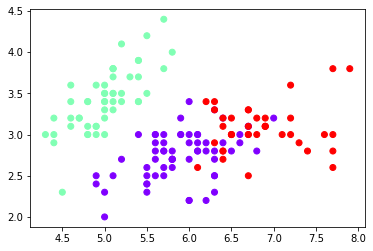

In [67]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='rainbow')
df['prediction'] = y_kmeans
print(y_kmeans)

In [72]:

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,prediction,correct
0,5.1,3.5,1.4,0.2,setosa,setosa,True
1,4.9,3.0,1.4,0.2,setosa,setosa,True
2,4.7,3.2,1.3,0.2,setosa,setosa,True
3,4.6,3.1,1.5,0.2,setosa,setosa,True
4,5.0,3.6,1.4,0.2,setosa,setosa,True


In [73]:

df.loc[df['prediction'] ==  1, 'prediction'] = 'setosa'
df.loc[df['prediction'] ==  0, 'prediction'] = 'versicolor'
df.loc[df['prediction'] ==  2, 'prediction'] = 'virginica'

df['correct'] = df['Species'] == df['prediction']

df

accuracy = sum(df['correct'] == True)

accuracy 

print('The accuracy of the KMeans model in predicting Iris Species is: {}%'.format(round(accuracy/150 * 100,2)))



The accuracy of the KMeans model in predicting Iris Species is: 89.33%


[1] https://www.datasciencelearner.com/k-means-clustering-in-python-label-dataset/#:~:text=%20K%20Means%20Clustering%20in%20Python%20%3A%20Label,can%20also%20use%20your%20own%20dataset.%20More%20

[2] https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

[3] https://medium.com/@harimittapalli/exploratory-data-analysis-iris-dataset-9920ea439a3e